## FFT(Fast Fourier Transform)
- https://m.blog.naver.com/PostView.nhn?blogId=gaechuni&logNo=221649637954&proxyReferer=https:%2F%2Fwww.google.com%2F&view=img_2
- 주기성과 대칭성을 이용하여 이산 푸리에 변환, 역변환을 수행하는 알고리즘

> Fourier series(푸리에급수)
- 유한 구간의 정의된 함수는 삼각함수(sin, cos)의 합으로 나타낼 수 있음.
- 이를 무한 구간으로 확장하는 것이 푸리에 변환
- 예: 사각파를 무한개으 사인파를 합한 조합으로 표현할 수 있음.


In [1]:
#512샘플만큼 overlab해서 1024FFT수행

import scipy.signal as signal
import math
import librosa
import numpy as np

def wav_fft(file_name):
    print("fft start")
    audio_sample, sampling_rate = librosa.load(file_name, sr = None)        
    fft_result = librosa.stft(audio_sample, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann).T                    
    mag, phase = librosa.magphase(fft_result)                    
    print("fft end")
    return mag, sampling_rate, fft_result

#normalize_function
min_level_db = -100
def _normalize(S):
    return np.clip((S-min_level_db)/(-min_level_db), 0, 1)

C:\Users\user\anaconda3\envs\django36\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
mag, sampling_rate, fft_result = wav_fft("./data/test-bimung.mp3")
mag_db = librosa.amplitude_to_db(mag)
mag_n = _normalize(mag_db)


fft start
fft end


C:\Users\user\anaconda3\envs\django36\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [3]:
mag.shape

(187, 513)

In [4]:
sampling_rate

48000

In [5]:
mag_db.shape

(187, 513)

In [6]:
# nomalize result
mag_n.shape


(187, 513)

In [7]:
fft_result.shape

(187, 513)

#### 스펙트로그램으로 그리기
- 스펙트로그램: FFT의 결과(스텍트럼)을 시간적으로 쭉 나열한것

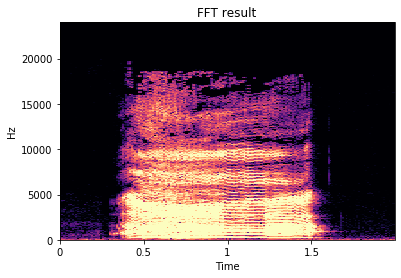

In [8]:
import matplotlib.pyplot as plt
import librosa.display

librosa.display.specshow(mag_n.T, y_axis='linear', x_axis='time', sr=sampling_rate)
plt.title('FFT result')
plt.show()

In [9]:
plt.plot(human_sound2)

NameError: name 'human_sound2' is not defined

In [10]:
mag_n.T.shape

(513, 187)

# 분석해보자
- https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

## 1. Reading Audio Files


In [11]:
filename = "./data/test-bimung.mp3"

audio_sample, sampling_rate = librosa.load(filename, sr = None) 

C:\Users\user\anaconda3\envs\django36\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [12]:
audio_sample.shape

(95437,)

In [13]:
sampling_rate

48000

In [14]:
duration_of_sound = len(audio_sample)/sampling_rate
print(duration_of_sound, 'second')

1.9882708333333334 second


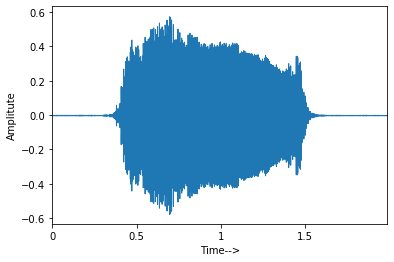

In [15]:
from librosa import display
plt.figure()
librosa.display.waveplot(y=audio_sample, sr = sampling_rate)
plt.xlabel('Time-->')
plt.ylabel('Amplitute')
plt.show()

## 2. Fourier Transform(FT)
- 신호를 구성 주파수로 분해
- 신호에 존재하는 주파수 뿐 아니라 신호에 존재하는 각 주파수의 크기를 제공
- 연속 신호를 사용

## 3. Fast Fourier Transform(FFT)
- 주어진 시퀀스의 이산푸리에 변환(DFT)을 계산하는 것.
- 이산 신호를 사용

>DFT
- 연속 신호에 대에 이산신호(시퀀스)주파수 성분으로 변환
- 시간 영역 이산신호를 주파수 영역으로 변환

### 사인파를 연습해보자

Text(0, 0.5, 'amplitude')

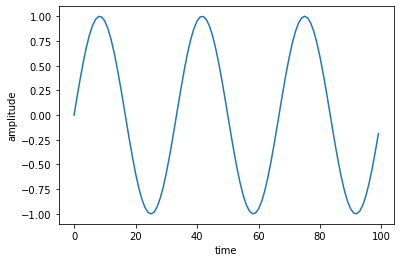

In [16]:
samples = 100
f = 3
x = np.arange(samples)
y1 = np.sin(2 * np.pi * f * (x/samples))
plt.plot(x, y1)
plt.xlabel('time')
plt.ylabel('amplitude')

In [17]:
import scipy
audio = y1

n = len(audio)
T = 1/samples
print(n, T)

100 0.01


In [18]:
print(sampling_rate)

48000


In [19]:
yf = scipy.fft(audio)
print(yf.shape)

(100,)


C:\Users\user\anaconda3\envs\django36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


In [20]:
print(1.0/(2.0*T))

50.0


In [21]:
xf = np.linspace(0, int(1/(2*T)), int(n/2))
print(len(xf))

50


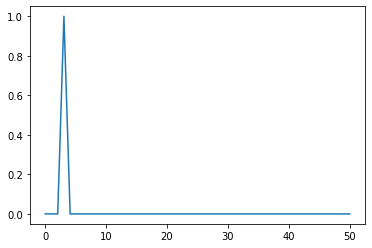

In [22]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/n*np.abs(yf[:n//2]))
plt.show()

In [23]:
(2.0/n*np.abs(yf[:n//2])).shape

(50,)

In [24]:
yf.shape

(100,)

### 오디오 신호의 FFT

In [25]:
filename = "./data/test-bimung.mp3"

audio_sample, sampling_rate = librosa.load(filename, sr = None) 


C:\Users\user\anaconda3\envs\django36\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [26]:
n = len(audio_sample)
T = 1/sampling_rate
print(n, T)

95437 2.0833333333333333e-05


In [27]:
yf = scipy.fft(audio_sample)
print(yf.shape)

(95437,)


C:\Users\user\anaconda3\envs\django36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


In [28]:
print(1.0/(2.0*T))

24000.0


In [29]:
xf = np.linspace(0, int(1/(2*T)), int(n/2))
print(len(xf))

47718


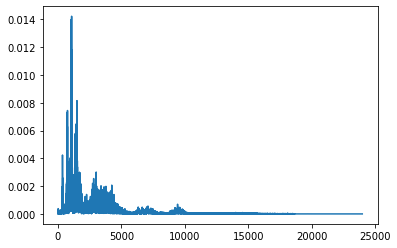

In [30]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/n*np.abs(yf[:n//2]))
plt.show()

> 사람의 음성 주파수
- 0~1kHz 

In [31]:
max_freq = max(yf)
max_freq

(673.6034928525132-20.55056559642918j)

## 4. 스펙트로그램
> 스펙트로그램
- FFT는 주파수값만 있고, 시간 정보가 없음.
- 주어진 신호의 주파수를 시간에 따라 시각적으로 표현한 것
- 색: 특정 시간의 관측된 주파수의 크기(진폭)
- 밝은 색: 강한 주파수

In [32]:
samples = audio_sample
sample_rate = 48000.0
stride_ms = 10.0
window_ms = 20.0
# max_freq = None
eps = 1e-14

In [33]:
stride_size = int(0.001 * sample_rate * stride_ms)

In [34]:
window_size = int(0.001 * sample_rate * window_ms)

# Extract strided windows
truncate_size = (len(samples) - window_size) % stride_size
samples = samples[:len(samples) - truncate_size]
nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
nstrides = (samples.strides[0], samples.strides[0] * stride_size)
windows = np.lib.stride_tricks.as_strided(samples, 
                                      shape = nshape, strides = nstrides)

assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

In [35]:
# Window weighting, squared Fast Fourier Transform (fft), scaling
weighting = np.hanning(window_size)[:, None]

fft = np.fft.rfft(windows * weighting, axis=0)
fft = np.absolute(fft)
fft = fft**2

scale = np.sum(weighting**2) * sample_rate
fft[1:-1, :] *= (2.0 / scale)
fft[(0, -1), :] /= scale

# Prepare fft frequency list
freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])

In [36]:
freqs.shape

(481,)

In [37]:
max_freq

(673.6034928525132-20.55056559642918j)

In [38]:
# Compute spectrogram feature
ind = np.where(freqs <= max_freq)[0][-1] + 1

In [39]:
specgram = np.log(fft[:ind, :] + eps)
print(specgram)

[[-20.82404588 -20.27180484 -22.64348605 ... -20.84013528 -22.18021161
  -21.98980759]
 [-19.9579686  -18.99722459 -19.93003187 ... -20.12004257 -21.58550155
  -19.47526109]
 [-20.46865439 -20.47168003 -21.83841273 ... -21.66056176 -20.15699328
  -18.91530842]
 ...
 [-24.35699851 -24.29253329 -24.42614273 ... -27.12295129 -25.56648167
  -26.06630509]
 [-24.73459694 -25.70928631 -25.91745089 ... -26.72368499 -27.63352015
  -25.89317437]
 [-25.52362935 -26.25587735 -24.67842461 ... -30.33718811 -27.53394328
  -26.10681168]]


In [40]:
specgram.shape

(14, 197)